# Customer Churn Analysis


In [1]:
#Importing the libraries


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ARDRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"E:\Anuradha\datatrained\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.drop(['TotalCharges', 'customerID'], axis = 1, inplace=True)

### Understanding The DataSet:


In [9]:
gender_percent = (df["gender"].value_counts()/df.shape[0])*100
print(gender_percent)

Male      50.47565
Female    49.52435
Name: gender, dtype: float64


#### Dataset appears to have approximately 50.47% of Male respondents and approximately 49.52 % of Female respondents

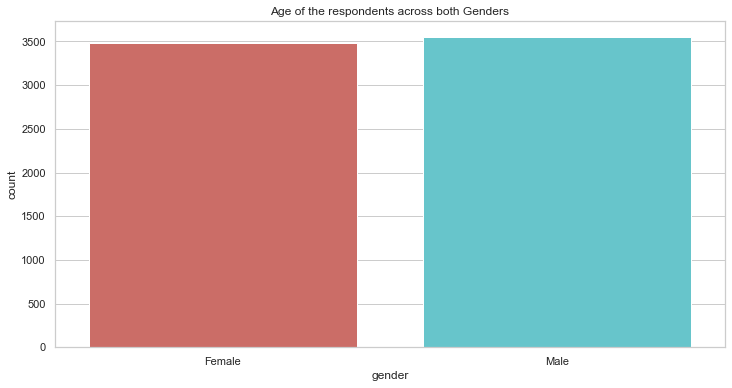

In [10]:
# Gender :
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="gender", data=df, palette="hls").set(title='Age of the respondents across both Genders')

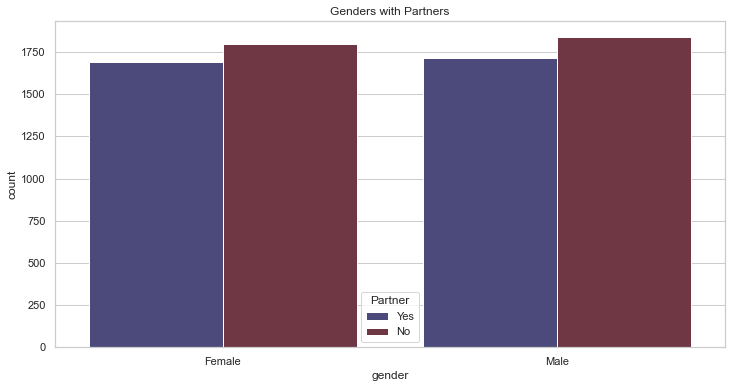

In [11]:
# Data shows married have a partner:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="gender", data=df, hue="Partner", palette="icefire").set(title='Genders with Partners')

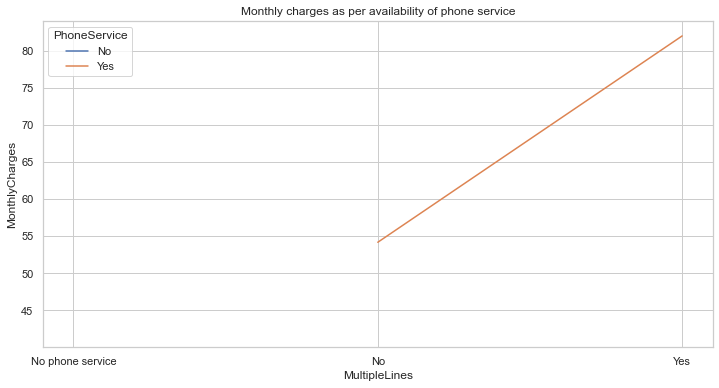

In [12]:
# customers who still do not have a telephone service  and Monthly charges as per availability of phone service:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="MultipleLines", y="MonthlyCharges", 
             hue="PhoneService", ci=None).set(title='Monthly charges as per availability of phone service')
plt.show()

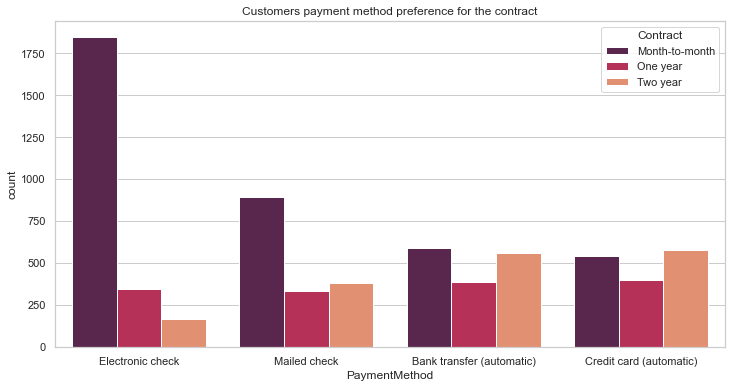

In [13]:
# Relationship between type of connection contract and payment methods in month-to-month:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="PaymentMethod", data=df, hue="Contract", palette="rocket").set(title='Customers payment method preference for the contract')

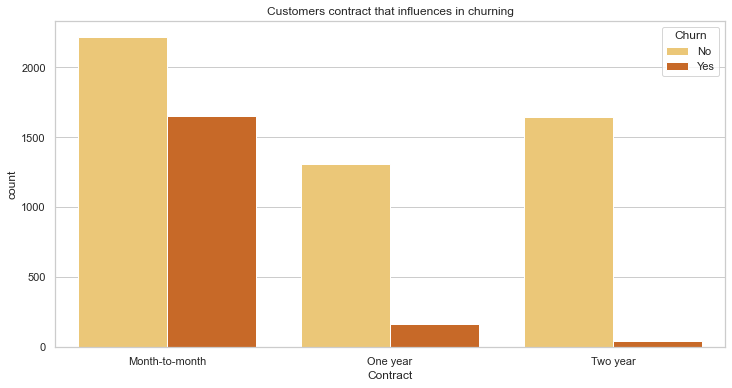

In [14]:
# Relationship between contract chosen and churn overall:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Contract", data=df, hue="Churn", palette="YlOrBr").set(title='Customers contract that influences in churning')

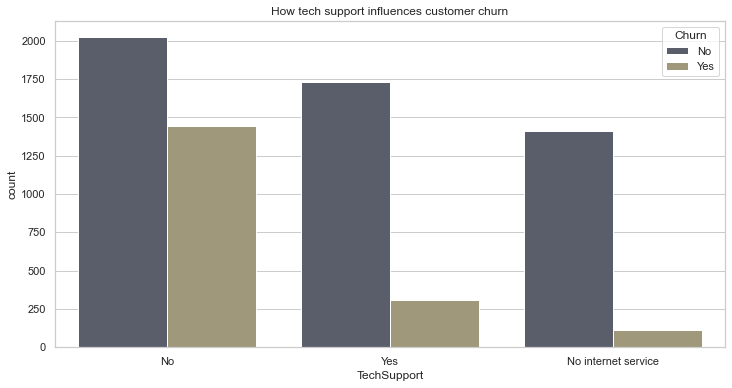

In [15]:
# "TechSupport" play's important role in the service but "TechSupport" is limited:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="TechSupport", data=df, hue="Churn", palette="cividis").set(title='How tech support influences customer churn')

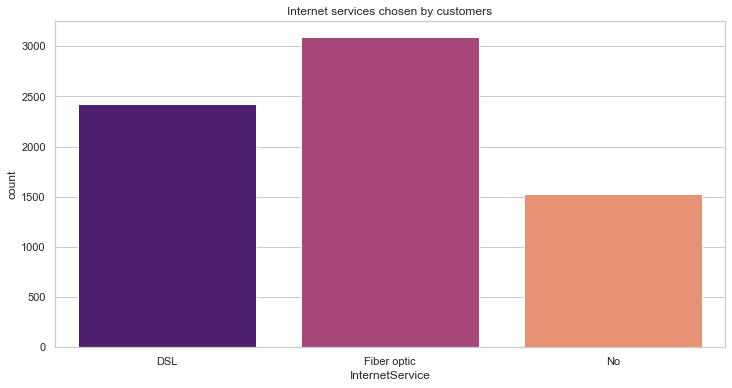

In [16]:
# Customers having "Fiber Optic" cable network:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="InternetService", data=df, palette="magma").set(title='Internet services chosen by customers')

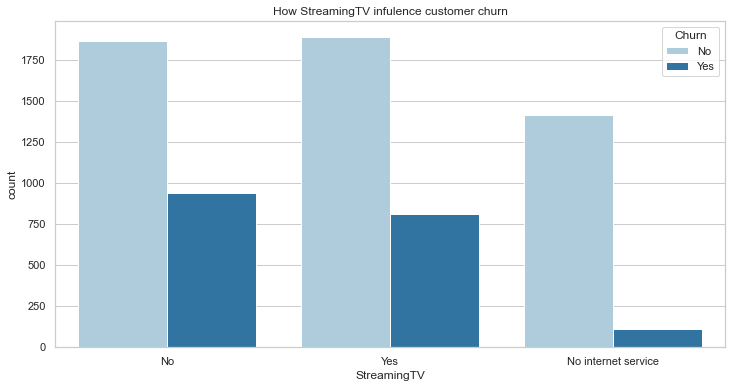

In [17]:
# Customers opting for "Streaming TV" and "Streaming Movies" 
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="StreamingTV", data=df, hue="Churn", palette="Paired").set(title='How StreamingTV infulence customer churn')

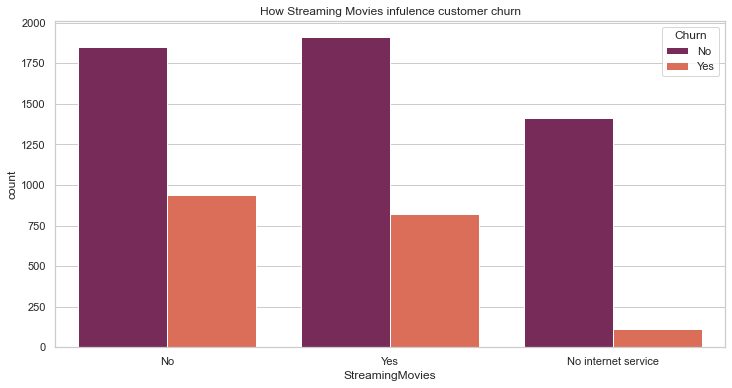

In [18]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="StreamingMovies", data=df, hue="Churn", palette="rocket").set(title='How Streaming Movies infulence customer churn')

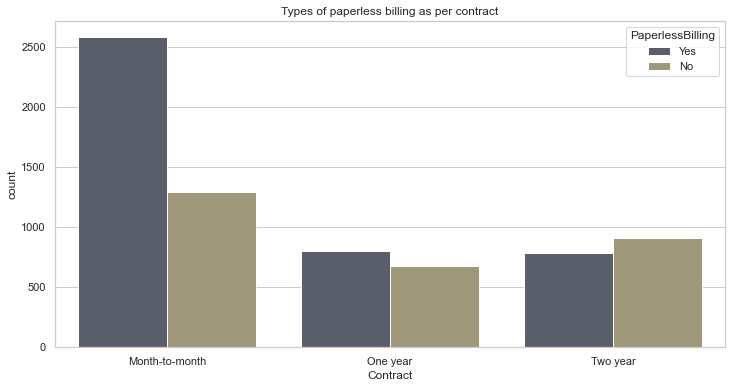

In [19]:
# customers whoopt for "month-to-month" Paper less Billing service:

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Contract", data=df, hue= "PaperlessBilling", palette="cividis").set(title='Types of paperless billing as per contract')

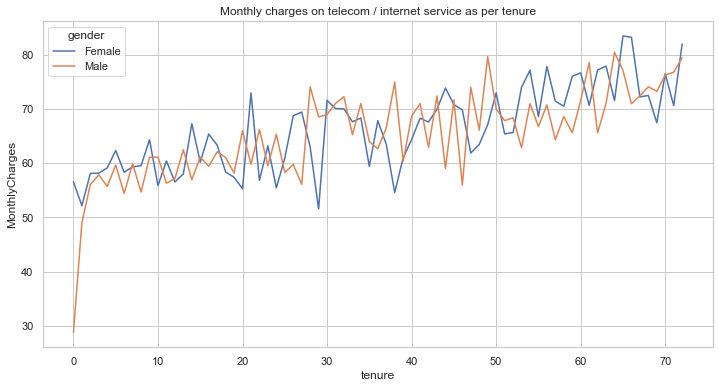

In [20]:
# Monthly charges increase as per the tenerue:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.lineplot(data=df, x="tenure", y="MonthlyCharges", 
             hue="gender", ci=None).set(title='Monthly charges on telecom / internet service as per tenure')
plt.show()

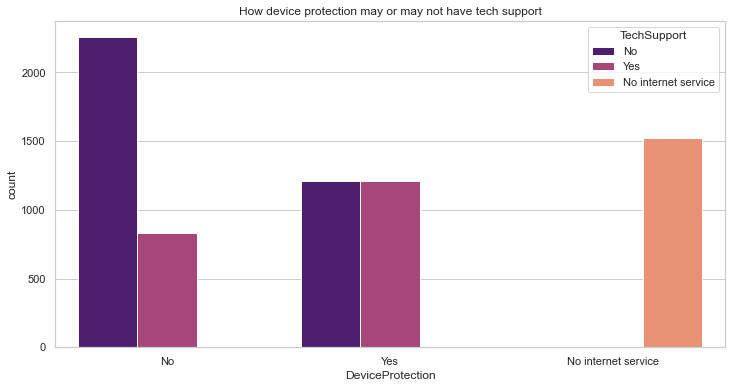

In [21]:
# Telephone devices are not protected and have very little tech support compared to other devices that are protected:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="DeviceProtection", data=df, hue= "TechSupport", palette="magma").set(title='How device protection may or may not have tech support')


### Encoding the dataset


In [22]:
feat = df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]

In [23]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [24]:
df_new2 = lab_enc.fit_transform(df["gender"])
df_new3 = lab_enc.fit_transform(df["Partner"])
df_new4 = lab_enc.fit_transform(df["Dependents"])
df_new5 = lab_enc.fit_transform(df["PhoneService"])
df_new6 = lab_enc.fit_transform(df["MultipleLines"])
df_new7 = lab_enc.fit_transform(df["InternetService"])
df_new8 = lab_enc.fit_transform(df["OnlineSecurity"])
df_new9 = lab_enc.fit_transform(df["OnlineBackup"])
df_new10 = lab_enc.fit_transform(df["DeviceProtection"])
df_new11 = lab_enc.fit_transform(df["TechSupport"])
df_new12 = lab_enc.fit_transform(df["StreamingTV"])
df_new13 = lab_enc.fit_transform(df["StreamingMovies"])
df_new14 = lab_enc.fit_transform(df["Contract"])
df_new15 = lab_enc.fit_transform(df["PaperlessBilling"])
df_new16 = lab_enc.fit_transform(df["PaymentMethod"])
df_new18 = lab_enc.fit_transform(df["Churn"])

df["gender"] = df_new2
df["Partner"] = df_new3
df["Dependents"] = df_new4
df["PhoneService"] = df_new5
df["MultipleLines"] = df_new6
df["InternetService"] = df_new7
df["OnlineSecurity"] = df_new8
df["OnlineBackup"] = df_new9
df["DeviceProtection"] = df_new10
df["TechSupport"] = df_new11
df["StreamingTV"] = df_new12
df["StreamingMovies"] = df_new13
df["Contract"] = df_new14
df["PaperlessBilling"] = df_new15
df["PaymentMethod"] = df_new16
df["Churn"] = df_new18

### Z-score:

In [25]:
from scipy.stats import zscore

z_score = zscore(df[['tenure','MonthlyCharges']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


#### Correlation :

In [26]:
corr_matrix = df.corr()
corr_matrix["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

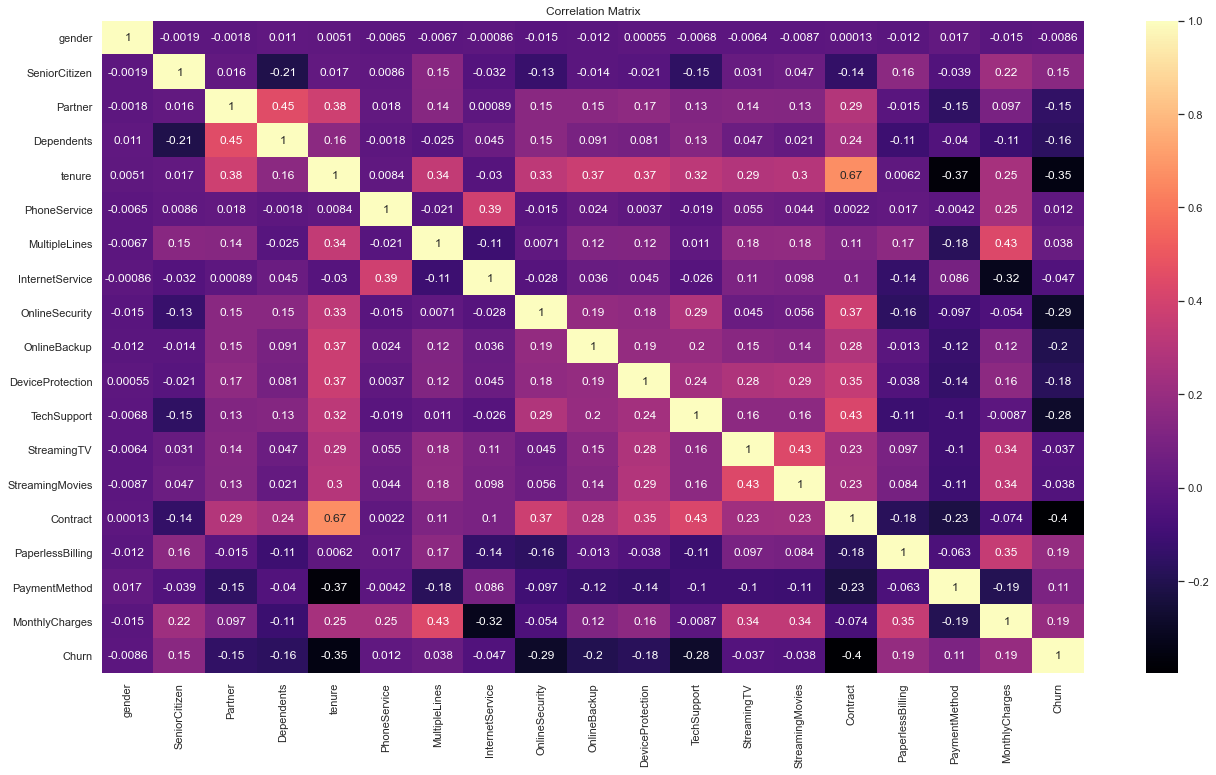

In [27]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title("Correlation Matrix")
plt.show()

### Skeewness:


In [28]:
x = df.drop(columns = ["Churn"], axis=1)
y = df["Churn"]

x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
dtype: float64

In [29]:
# StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [30]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.16032292],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.20511329,
         1.33486261, -0.25962894],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
         1.33486261, -0.36266036],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.8297975 ,
         0.39855772, -1.1686319 ],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.8297975 ,
         1.33486261,  0.32033821],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.8297975 ,
        -1.47405205,  1.35896134]])

In [31]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

### Train-Test split:

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)

In [34]:
from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Re-build models:


In [35]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7032654992901088
[[1220  310]
 [ 317  266]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1530
           1       0.46      0.46      0.46       583

    accuracy                           0.70      2113
   macro avg       0.63      0.63      0.63      2113
weighted avg       0.70      0.70      0.70      2113



In [36]:
# ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

ex_reg = ExtraTreesClassifier()
ex_reg.fit(x_train,y_train)

y_pred = ex_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7624230951254141
[[1365  165]
 [ 337  246]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1530
           1       0.60      0.42      0.49       583

    accuracy                           0.76      2113
   macro avg       0.70      0.66      0.67      2113
weighted avg       0.75      0.76      0.75      2113



In [37]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7747278750591576
[[1368  162]
 [ 314  269]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1530
           1       0.62      0.46      0.53       583

    accuracy                           0.77      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



#### DecisionTreeClassifier and RandomForestRegressor

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

dt = ExtraTreesRegressor()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print("Adjusted R2 squared : ",dt.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9927234682490771
Mean Absolute Error (MAE):  0.28370642057106793
Mean Squared Error (MSE):  0.17191924725245833
Root Mean Squared Error (RMSE):  0.414631459554697


In [66]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

print("Adjusted R2 squared : ",rf.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.8897060125926811
Mean Absolute Error (MAE):  0.28413457507944023
Mean Squared Error (MSE):  0.15725014309618784
Root Mean Squared Error (RMSE):  0.39654778160543


In [68]:
# ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

ext_reg = ExtraTreesRegressor()
ext_reg.fit(x_train,y_train)

y_pred = ext_reg.predict(x_test)

print("Adjusted R2 squared : ",ext_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9927234682490771
Mean Absolute Error (MAE):  0.2823655150654678
Mean Squared Error (MSE):  0.1712647013198717
Root Mean Squared Error (RMSE):  0.41384139633423783


In [49]:
# KNN

from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.4148195632096391
Mean Absolute Error (MAE):  0.29673450070989116
Mean Squared Error (MSE):  0.17622337908187413
Root Mean Squared Error (RMSE):  0.41978968434428465


## Cross-Validation: 

In [41]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTreeClasifier model is:", scr.mean())

scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

scr = cross_val_score(ex_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeClasifier model is: 0.7234116918833473
Cross Validation score of RandomForestRegressor model is: 0.7898637613717014
Cross Validation score of KNeighborsRegressor model is: 0.16559932562318894
Cross Validation score of ExtraTreesRegressor model is: 0.7732513992838247


In [74]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

scr = cross_val_score(ex_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DecisionTreeClasifier model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.23793857695143653
Cross Validation score of KNeighborsRegressor model is: 0.16559932562318894
Cross Validation score of ExtraTreesRegressor model is: 0.7704101877540486
Cross Validation score of DecisionTreeClasifier model is: 0.13391461967460871


## ROC AUC score:

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [44]:
# Scores :

print('ROC_AUC_SCORE_ExtraTrees_REGRESSION :',roc_auc_score(y_test, ex_reg.predict(x_test)))

print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test, dt.predict(x_test)))

print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test, rf.predict(x_test)))

print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,k_neigh.predict(x_test)))

ROC_AUC_SCORE_ExtraTrees_REGRESSION : 0.6570561329162883
ROC_AUC_SCORE_RANDOM_FOREST : 0.6268231706633484
ROC_AUC_SCORE_DECISION_TREE : 0.6777620825345575
ROC_AUC_SCORE_KNN : 0.7590157961412123


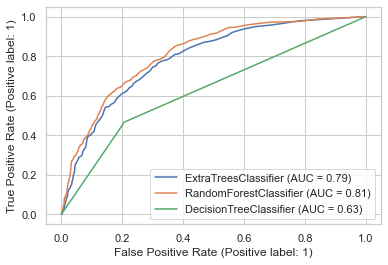

In [50]:
# Plotting Roc-Auc curve
disp = plot_roc_curve(ex_reg,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size': 11},loc='lower right')
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


### New Model:

In [62]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)

In [64]:
rf_tuned = LinearRegression(copy_X=True , n_jobs=1 , normalize=False)
rf_tuned.fit(x_train,y_train)
rf_tuned_ypred = rf_tuned.predict(x_test)
r2_score_rf_tuned = r2_score(y_test,rf_tuned_ypred)

print("Adjusted R2 squared : ",rf.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9971602434077079
Mean Absolute Error (MAE):  0.29673450070989116
Mean Squared Error (MSE):  0.17622337908187413
Root Mean Squared Error (RMSE):  0.41978968434428465


In [78]:
# Saving the model

import joblib
joblib.dump(rf_tuned,"Customer_Churn_Prediction.pkl")

['Customer_Churn_Prediction.pkl']

In [79]:
model = joblib.load("Customer_Churn_Prediction.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,0.065653
1,0.255746
2,0.089718
3,0.153175
4,0.520027
...,...
2108,0.421794
2109,0.391288
2110,0.222057
2111,0.018291
